In [1]:
import yaml

with open("config.yaml", "r") as y:
    cfg = yaml.safe_load(y)

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

SEED = 1

In [3]:
dataset = pd.read_csv(cfg["credit_limits"]["dataset"])
dataset.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [5]:
nan_df = dataset.isnull().mean()
nan_df

CLIENTNUM                                                                                                                             0.0
Attrition_Flag                                                                                                                        0.0
Customer_Age                                                                                                                          0.0
Gender                                                                                                                                0.0
Dependent_count                                                                                                                       0.0
Education_Level                                                                                                                       0.0
Marital_Status                                                                                                                        0.0
Income_Category                   

In [6]:
trash = [
    "CLIENTNUM",
    #"Attrition_Flag",
    #"Total_Revolving_Bal",                                                                                                                   
    "Avg_Open_To_Buy",                                                                                                                       
    #"Total_Amt_Chng_Q4_Q1",
    #"Card_Category",                                                                                                                  
    #"Total_Trans_Amt",                                                                                                                       
    #"Total_Trans_Ct",                                                                                                                        
    #"Total_Ct_Chng_Q4_Q1",                                                                                                                   
    #"Avg_Utilization_Ratio", 
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"
]
dataset = dataset.drop(trash, axis = 1)
dataset.head()
print(len(dataset.columns))

19


In [7]:
for i in dataset:
    most_popular_value_count = dataset[i].value_counts().iloc[0]
    print(most_popular_value_count/len(dataset))

0.8393403772094401
0.04937296336526118
0.5290806754221389
0.2697738718277871
0.308877258813074
0.4628221585859583
0.35163424508739016
0.931766564629209
0.2432112175372766
0.22760936111385405
0.379776834205589
0.3337612323491656
0.050162930779105365
0.24390243902439024
0.0035548533622988053
0.001086205194035746
0.02053915275994865
0.016885553470919325
0.24390243902439024


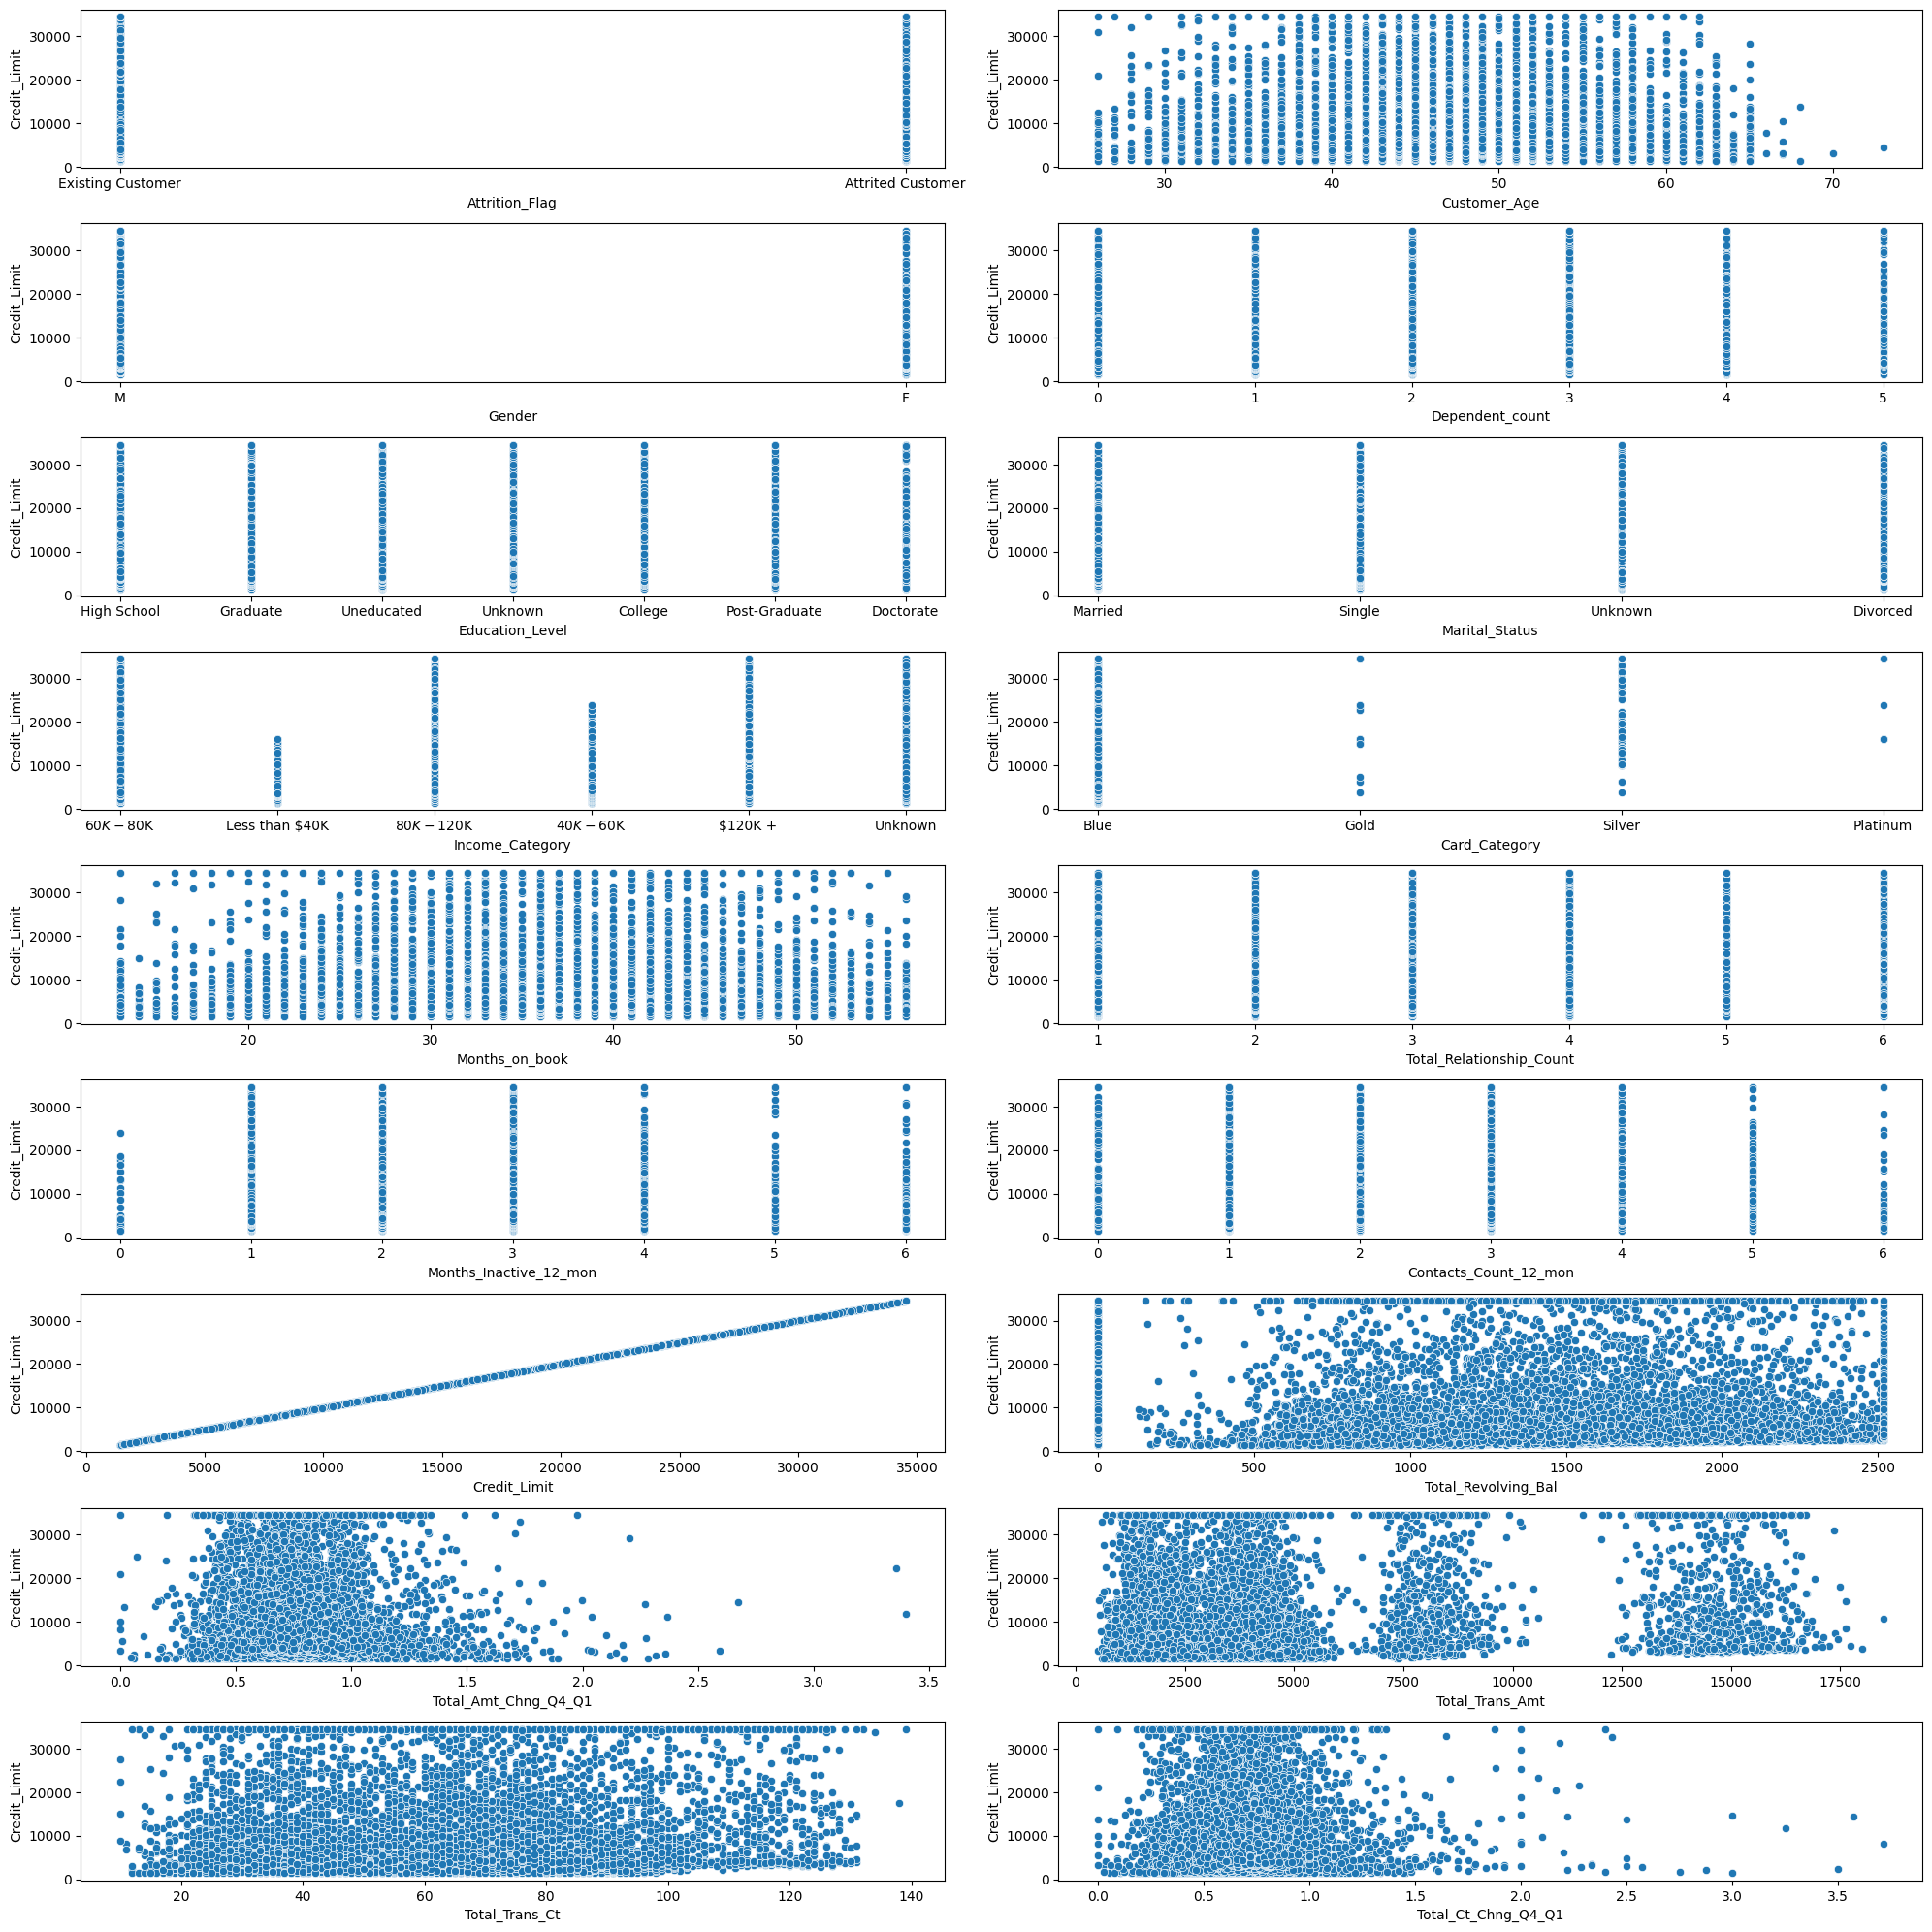

In [8]:
fig, axes = plt.subplots(9, 2, figsize=(20, 20))
axes_flattened = axes.reshape(-1)
for i in range(len(dataset.columns)-1):
    ax = axes_flattened[i]
    sns.scatterplot(
        x=dataset.iloc[:, i],
        y='Credit_Limit',
        data=dataset,
        ax=ax,
    )
fig.tight_layout(pad=1.0)

Избавление от категории Unknown

In [9]:
dataset["Education_Level"].value_counts()

Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

In [10]:
dataset["Marital_Status"].value_counts()

Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

In [11]:
dataset["Income_Category"].value_counts()

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

In [12]:
dataset.count()[0]

10127

In [13]:
## drop -30%
# dataset = dataset.drop(dataset[(dataset["Income_Category"] == "Unknown") | (dataset["Marital_Status"] == "Unknown") | (dataset["Education_Level"] == "Unknown")].index)
# dataset.reset_index(inplace=True,drop=True)
# dataset.count()[0]

In [14]:
cols = ["Income_Category","Marital_Status","Education_Level"]
for col in cols:
    dataset.loc[(dataset[col] == "Unknown"),col] = np.resize(dataset[col].mode()[0], len(dataset[(dataset[col] == "Unknown")]))

dataset[(dataset["Income_Category"] == "Unknown") | (dataset["Marital_Status"] == "Unknown") | (dataset["Education_Level"] == "Unknown")]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


In [15]:
dataset = dataset.drop(dataset[(dataset["Customer_Age"] > 65) | (dataset["Total_Amt_Chng_Q4_Q1"] > 2) | (dataset["Total_Ct_Chng_Q4_Q1"] > 2)].index)
dataset.reset_index(inplace=True, drop=True)
dataset.count()[0]

10076

# Выбор метода для категориальных перем.
Label enc - слишком просто. \\
One hot enc - нагрузка на dim модель (~3.8).  \\
Target enc - data leak.? \\
Frequency enc ~2.8\\

In [16]:
# import category_encoders as ce

# count_encoder = ce.CountEncoder(normalize=True)
# dataset["Gender"] = count_encoder.fit_transform(dataset["Gender"])
# dataset["Education_Level"] = count_encoder.fit_transform(dataset["Education_Level"])
# dataset["Marital_Status"] = count_encoder.fit_transform(dataset["Marital_Status"])
# dataset["Income_Category"] = count_encoder.fit_transform(dataset["Income_Category"])
# dataset.head()

In [17]:
cat_df = dataset.select_dtypes(include=['object'])
cat_df

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,M,Graduate,Married,$40K - $60K,Blue
2,Existing Customer,M,Graduate,Married,$120K +,Gold
3,Existing Customer,M,Graduate,Single,$80K - $120K,Blue
4,Existing Customer,M,Uneducated,Married,$120K +,Blue
...,...,...,...,...,...,...
10071,Existing Customer,M,Graduate,Single,$40K - $60K,Blue
10072,Attrited Customer,M,Graduate,Divorced,$40K - $60K,Blue
10073,Attrited Customer,F,High School,Married,Less than $40K,Blue
10074,Attrited Customer,M,Graduate,Married,$40K - $60K,Blue


In [18]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False)
onehot_encoder.fit(cat_df)
dataset = dataset.join(pd.DataFrame(onehot_encoder.transform(cat_df)))
dataset = dataset.drop(cat_df.columns,axis=1)
dataset

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,...,12,13,14,15,16,17,18,19,20,21
0,45,3,39,5,1,3,12691.0,777,1.335,1144,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,44,2,36,3,1,2,4010.0,1247,1.376,1088,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,51,4,46,6,1,3,34516.0,2264,1.975,1330,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,48,2,36,6,3,3,11656.0,1677,1.524,1441,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,42,5,31,5,3,2,6748.0,1467,0.831,1201,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10071,50,2,40,3,2,3,4003.0,1851,0.703,15476,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10072,41,2,25,4,2,3,4277.0,2186,0.804,8764,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10073,44,1,36,5,3,4,5409.0,0,0.819,10291,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
10074,30,2,36,4,3,3,5281.0,0,0.535,8395,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [19]:
target = "Credit_Limit"
features = list(dataset.columns)
features.remove("Credit_Limit")
features

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Total_Revolving_Bal',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21]

Подготовка для использования моделей

In [20]:
from sklearn.model_selection import train_test_split

x = dataset[features]
y = dataset[[target]]
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values.reshape(-1), train_size=0.8, shuffle=True, random_state=SEED)

Нормализация

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Полиномиальная регрессия с регуляризацией $L_2$


In [22]:
from sklearn import linear_model
s = 0
for i in np.arange(1,100,1):
    clf1 = linear_model.Lasso(alpha=i,max_iter=100000)
    clf1.fit(x_train,y_train)
    s = max(s,clf1.score(x_test, y_test))
s

0.642904050732108

Полиномиальная регрессия с регуляризацией $L_1$

In [23]:
s = 0
for i in np.arange(1,100,1):
    clf2 = linear_model.Ridge(alpha=i, max_iter=100000)
    clf2.fit(x_train, y_train)
    s = max(s,clf2.score(x_test, y_test))
s

0.6420556311989326

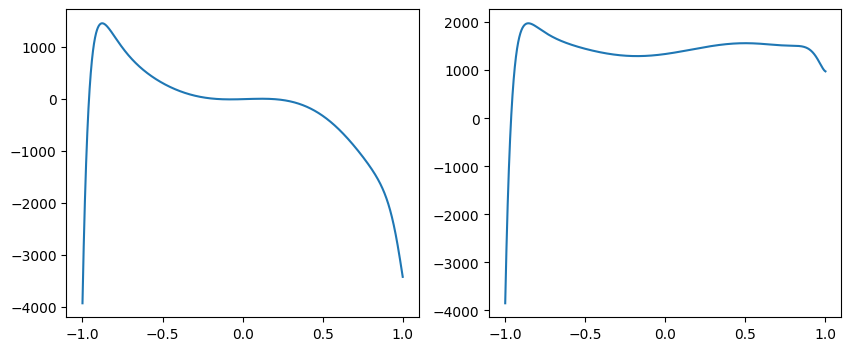

In [24]:
def f1(x):
    val = 0
    for i in range(len(clf1.coef_)):
        val += pow(x,i)*clf1.coef_[len(clf1.coef_)-i-1]
    return val

def f2(x):
    val = 0
    for i in range(len(clf2.coef_)):
        val += pow(x,i)*clf2.coef_[len(clf2.coef_)-i-1]
    return val

fig, axes = plt.subplots(1,2,figsize=(10,4))
axes[0].plot(np.arange(-1,1,0.0001),list(map(f1,np.arange(-1,1,0.0001))))
axes[1].plot(np.arange(-1,1,0.0001),list(map(f2,np.arange(-1,1,0.0001))))
plt.show()

In [25]:
#зависимость от features

# from sklearn.inspection import PartialDependenceDisplay
# fig, axes = plt.subplots(11,2, figsize = (10,50))
# PartialDependenceDisplay.from_estimator(clf1, x_test, x, feature_names=features, ax=axes)
# plt.show()

Ensemble models

RandomForest


In [50]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(max_depth=10, n_jobs=-1)
reg.fit(x_train, y_train)
reg.score(x_test, y_test)

0.8762678255030463

Grad_Boost

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor(learning_rate=0.2)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.8721315344435676

In [28]:
x = []
y = []
n = []

In [29]:
def append(values, func, l):
	x.append(values)
	y.append(list(map(func, values)))
	n.append(l)
def draw():
	fig, axes = plt.subplots(1,len(y), figsize=(15,4))
	for i in range(len(y)):
		axes[i].plot(x[i], y[i])
		axes[i].set_xlabel(n[i])
	plt.show()
	for list in y:
		print(max(list))

In [30]:
def f(a):
	clf = RandomForestRegressor(min_samples_leaf=a, n_jobs=-1)
	clf.fit(x_train, y_train)
	return clf.score(x_test, y_test)
append(np.arange(2, 30), f, 'min_samples_leaf')

In [31]:
def f(a):
	clf = RandomForestRegressor(max_depth=a, n_jobs=-1)
	clf.fit(x_train, y_train)
	return clf.score(x_test, y_test)
append(np.arange(2, 30), f, 'max_depth')

In [32]:
def f(a):
	clf = RandomForestRegressor(max_leaf_nodes=a, n_jobs=-1)
	clf.fit(x_train, y_train)
	return clf.score(x_test, y_test)
append(np.arange(2, 30), f, 'max_leaf_nodes')

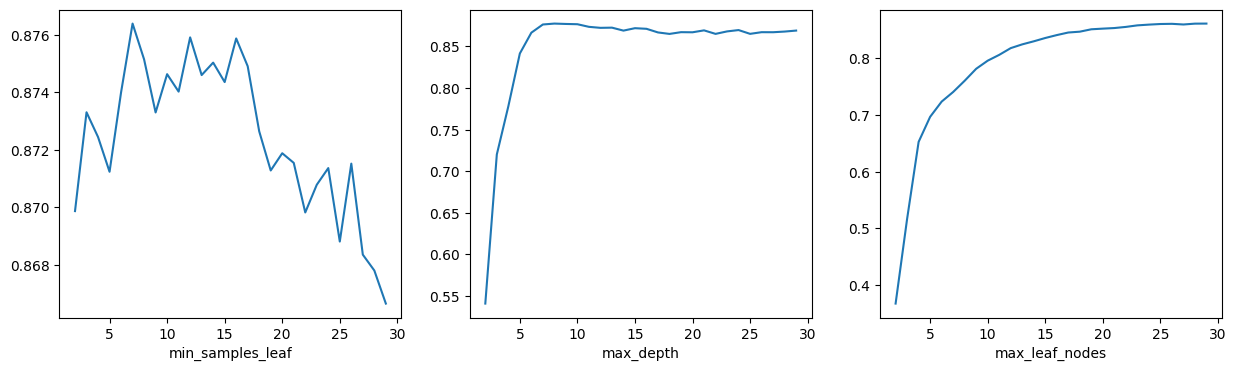

0.8763849837941192
0.8775146907840838
0.8613381028382288


In [33]:
plt.close()
draw()

In [34]:
x = []
y = []
n = []

In [35]:
def f(a):
	clf = GradientBoostingRegressor(learning_rate=a)
	clf.fit(x_train, y_train)
	return clf.score(x_test, y_test)
append(np.arange(0.05, 1, 0.05), f, 'learning_rate')

In [36]:
def f(a):
	clf = GradientBoostingRegressor(n_estimators=a)
	clf.fit(x_train, y_train)
	return clf.score(x_test, y_test)
append(np.arange(10, 200, 10), f, 'n_estimators')

In [37]:
def f(a):
	clf = GradientBoostingRegressor(alpha=a)
	clf.fit(x_train, y_train)
	return clf.score(x_test, y_test)
append(np.arange(0.05, 1, 0.05), f, 'alpha')

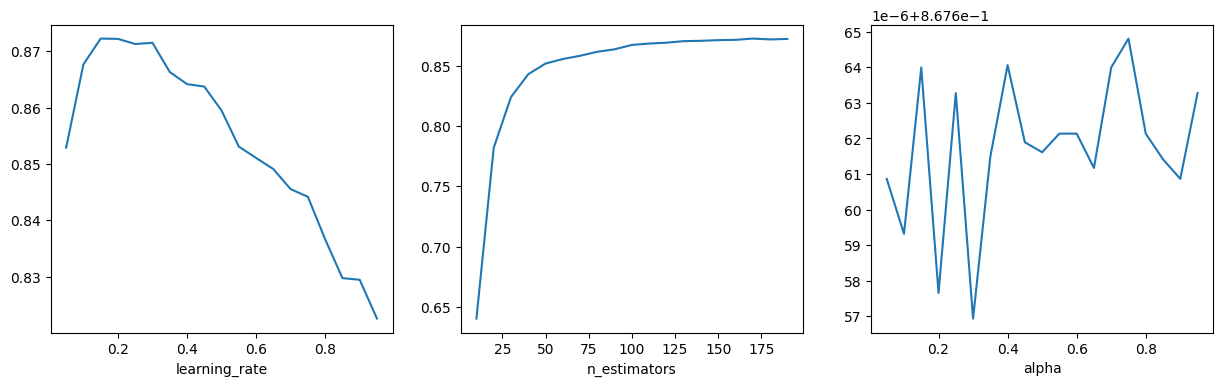

0.8722310447192864
0.8729604114948609
0.8676648096557209


In [38]:
plt.close()
draw()

In [39]:
import tkinter as tk
master = tk.Tk()

labels = [
    'Existing customer',
    'Gender',
    'Education',
    'Marital status',
    'Income',
    'Card category',
    'Age',
    'Dependent count',
    'Months on book',
    'Total relationship count',
    'Inactive months',
    'Contacts count',
    'Total balance',
    'Total amount changed',
    'Total transaction amount',
    'Total transaction count',
    'Total count changed',
    'Utilization ratio'
]
entries = []
out_entry = tk.StringVar()

def prefill():
    entries[0].set('1')
    entries[1].set('M')
    entries[2].set('High School')
    entries[3].set('Married')
    entries[4].set('65000')
    entries[5].set('Blue')
    entries[6].set('45')
    entries[7].set('1')
    entries[8].set('39')
    entries[9].set('5')
    entries[10].set('1')
    entries[11].set('3')
    entries[12].set('777')
    entries[13].set('1.335')
    entries[14].set('1144')
    entries[15].set('42')
    entries[16].set('1.625')
    entries[17].set('0.061')
def calc():
    arr = np.empty((1,12))
    for i in range(12):
        arr[0][i] = float(entries[i + 6].get())

    attrition = 'Existing Customer' if int(entries[0].get()) != 0 else 'Attrited Customer'

    income = float(entries[4].get())
    if income < 40000:
        income = 'Less than $40K'
    elif income < 60000:
        income = '$40K - $60K'
    elif income < 80000:
        income = '$60K - $80K'
    elif income < 120000:
        income = '$80K - $120K'
    else:
        income = '$120K +'

    to_convert = pd.DataFrame(columns=[
        'Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'])

    to_convert.loc[0] = [
        attrition,
        entries[1].get(),
        entries[2].get(),
        entries[3].get(),
        income,
        entries[5].get(),
    ]
    converted = onehot_encoder.transform(to_convert)

    arr = np.concatenate((arr, converted), axis=1)
    arr = scaler.transform(arr)
    out_entry.set('Credit limit = ' + str(reg.predict(arr)[0]))


for i in range(len(labels)):
    tk.Label(master, text=labels[i]+':').grid(row=i, sticky='E')
    entry_text = tk.StringVar()
    tk.Entry(master, textvariable=entry_text).grid(row=i, column=1)
    entries.append(entry_text)

tk.Button(master, text='Calculate credit limit', command=calc).grid(row=len(labels), columnspan=2)
tk.Label(master, textvariable=out_entry).grid(row=len(labels)+1, columnspan=2)

prefill()
tk.mainloop()